#### Usando o Face_Recognition

In [26]:
import os
import face_recognition
import pickle

encodings_file = "face_encodings.pkl"
photo_directory = "DS/"
known_face_encodings = []
known_face_names = []

# Gerar codificações
for file_name in os.listdir(photo_directory):
    if file_name.endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(photo_directory, file_name)
        image = face_recognition.load_image_file(image_path)
        encodings = face_recognition.face_encodings(image)
        if encodings:
            for i, _ in enumerate(encodings): # ADICIONADO 
                known_face_encodings.append(encodings[i]) # EDITADO
                known_face_names.append(image_path)
            print(f"O arquivo {file_name} é uma imagem e possui rosto(s) codificável(is).") 

# Salvar as codificações geradas em um arquivo
with open(encodings_file, "wb") as file:
    pickle.dump((known_face_encodings, known_face_names), file)

print("\n\nCodificações salvas em 'face_encodings.pkl'.")

O arquivo img-1.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-10.png é uma imagem e possui rosto(s) codificável(is).
O arquivo img-11.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-12.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-13.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-14.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-15.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-16.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-17.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-18.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-19.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-2.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-20.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-21.jpg é uma imagem e possui rosto(s) codificável(is).
O arquivo img-22.jpg é uma imagem e 

In [ ]:
# Carregar as codificações previamente salvas
with open("face_encodings.pkl", "rb") as file:
    known_face_encodings, known_face_names = pickle.load(file)

# Caminho da imagem alvo
target_image_path = "Artur.jpg"
target_image = face_recognition.load_image_file(target_image_path)
target_face_encodings = face_recognition.face_encodings(target_image)

target_encoding, face_distances = [], []

if target_face_encodings:
    for i, _ in enumerate(target_face_encodings):
        target_encoding.append(target_face_encodings[i])

    # Calcular distâncias
    for i in range(len(target_encoding)):
        face_distances.append(face_recognition.face_distance(known_face_encodings, target_encoding[i]))

    # Definir a tolerância
    tolerance = 0.6

    # Exibir imagens correspondentes
    for i in range(len(face_distances)):
        print(f"Rosto {i + 1}. Imagens encontradas:")
        for j, distance in enumerate(face_distances[i]):
            if distance <= tolerance:
                print(f" - {known_face_names[j]} (Distância: {distance:.4f})")

else:
    print("Nenhum rosto encontrado na imagem de entrada.")


Rosto 1. Imagens encontradas:
 - DS/img-10.png (Distância: 0.4235)
 - DS/img-11.jpg (Distância: 0.4390)
 - DS/img-12.jpg (Distância: 0.4413)
 - DS/img-45.jpg (Distância: 0.5055)
 - DS/img-46.jpg (Distância: 0.3694)
 - DS/img-9.jpg (Distância: 0.5102)


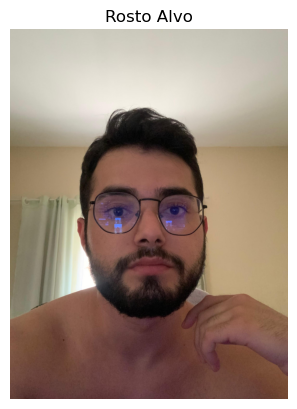

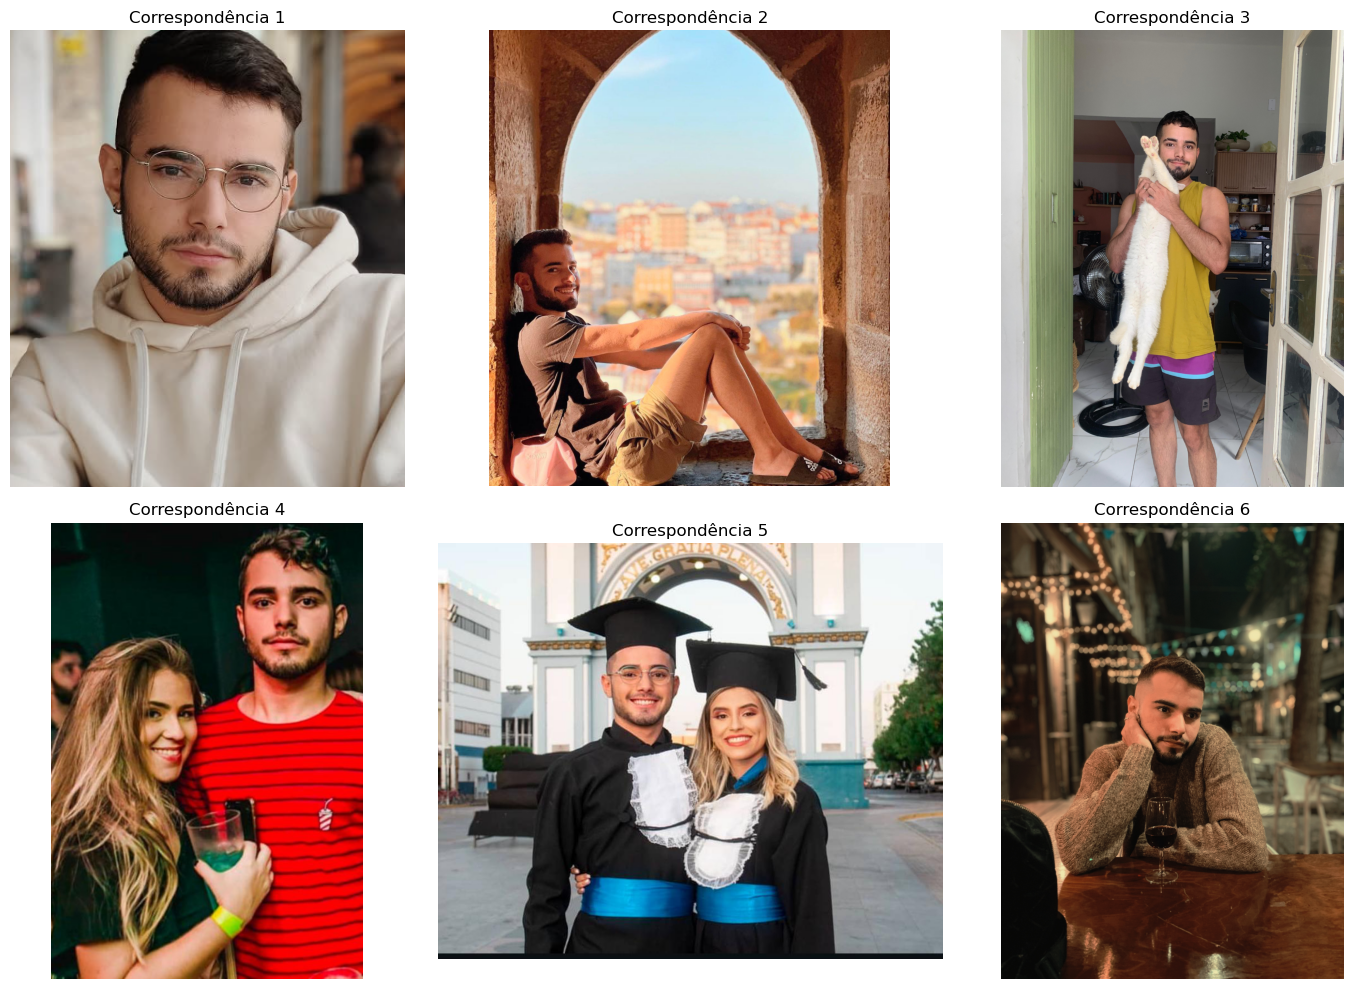

In [28]:
import matplotlib.pyplot as plt

# Mostrar a imagem alvo
target_image = face_recognition.load_image_file(target_image_path)
plt.imshow(target_image)
plt.title("Rosto Alvo")
plt.axis("off")
plt.show()


# Lista de imagens correspondentes
matched_images = [
    face_recognition.load_image_file(image_path)
    for image_path in [known_face_names[j] for j, dist in enumerate(face_distances[0]) if dist <= tolerance]
]

# Configurar os subplots
n_images = len(matched_images)
n_cols = 3  # Definindo 3 colunas por linha
n_rows = -(-n_images // n_cols)  # Arredondar para cima o número de linhas

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Garantir que axs seja um array bidimensional
axs = axs.ravel()

# Plotar as imagens
for idx, (ax, matched_image) in enumerate(zip(axs, matched_images)):
    ax.imshow(matched_image)
    ax.set_title(f"Correspondência {idx + 1}")
    ax.axis("off")  # Remover os eixos para clareza

# Remover subplots extras, se houver
for ax in axs[len(matched_images):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()